## Imports

In [520]:
import pandas as pd
import matplotlib.pyplot as plt

In [521]:
df = pd.read_excel('Sales_Luxury.xlsx')

In [522]:
df

,Unnamed: 0,City,Date,Product,Sales,Channel,Unnamed: 6,Unnamed: 7
0,0,Online,2024-04-27 00:00:00,Infallible Foundation,2.0,Website,NaN,NaN
1,1,Online,2018-07-01 00:00:00,Les Beiges,1.0,Website,NaN,NaN
2,2,Online,2018-07-31 00:00:00,Neverfull MM,1.0,Website,NaN,NaN
3,3,Online,2020-12-31 00:00:00,Superliner,1.0,Website,NaN,NaN
4,4,Online,2023-12-24 00:00:00,Alma BB,1.0,Website,NaN,NaN
...,...,...,...,...,...,...,...,...
59995,59995,Rome,2023-01-20 00:00:00,Les Beiges,0.0,Own Stoire,NaN,NaN
59996,59996,Rome,2023-07-19 00:00:00,La Petite Robe Noire,0.0,Own Stoire,NaN,NaN
59997,59997,Rome,2014-07-01 00:00:00,Libre,1.0,Own Stoire,NaN,NaN
59998,59998,Rome,2016-12-24 00:00:00,Opium,0.0,Own Stoire,NaN,NaN


### Drop useless column

In [523]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 6','Unnamed: 7'])

## Data Cleansing

### Data types

In [524]:
df.dtypes

City        object
Date        object
Product     object
Sales      float64
Channel     object
dtype: object

### Date column

In [525]:
df['Date'] = pd.to_datetime(df['Date'])

In [526]:
df.head()

,City,Date,Product,Sales,Channel
0,Online,2024-04-27,Infallible Foundation,2.0,Website
1,Online,2018-07-01,Les Beiges,1.0,Website
2,Online,2018-07-31,Neverfull MM,1.0,Website
3,Online,2020-12-31,Superliner,1.0,Website
4,Online,2023-12-24,Alma BB,1.0,Website


### Retrieve the month and the year

In [527]:
df['Month'] = df['Date'].dt.month

In [528]:
df['Year'] = df['Date'].dt.year

In [529]:
df.head()

,City,Date,Product,Sales,Channel,Month,Year
0,Online,2024-04-27,Infallible Foundation,2.0,Website,4,2024
1,Online,2018-07-01,Les Beiges,1.0,Website,7,2018
2,Online,2018-07-31,Neverfull MM,1.0,Website,7,2018
3,Online,2020-12-31,Superliner,1.0,Website,12,2020
4,Online,2023-12-24,Alma BB,1.0,Website,12,2023


### Null values

In [530]:
df.isnull().sum()

City       0
Date       0
Product    0
Sales      0
Channel    0
Month      0
Year       0
dtype: int64

### Main statistics

In [531]:
df.describe()

,Date,Sales,Month,Year
count,60000,60000.000000,60000.000000,60000.000000
mean,2019-08-09 04:17:16.800000,1.001067,7.676350,2019.006533
min,2014-01-01 00:00:00,0.000000,1.000000,2014.000000
25%,2016-12-22 00:00:00,1.000000,7.000000,2016.000000
50%,2019-08-07 00:00:00,1.000000,8.000000,2019.000000
75%,2022-07-01 00:00:00,1.000000,12.000000,2022.000000
max,2024-12-31 00:00:00,2.000000,12.000000,2024.000000
std,NaN,0.669482,3.821341,3.167258


## Unique values for every column

### City column

In [532]:
df.head()

,City,Date,Product,Sales,Channel,Month,Year
0,Online,2024-04-27,Infallible Foundation,2.0,Website,4,2024
1,Online,2018-07-01,Les Beiges,1.0,Website,7,2018
2,Online,2018-07-31,Neverfull MM,1.0,Website,7,2018
3,Online,2020-12-31,Superliner,1.0,Website,12,2020
4,Online,2023-12-24,Alma BB,1.0,Website,12,2023


In [533]:
df['City'].unique()

array(['Online', 'Tokyo', 'Seoul', 'Beijing', 'New York', 'Paris',
       'Sydney', 'Toronto', 'Los Angeles', 'London', 'Rome'], dtype=object)

### Product column

In [534]:
df['Product'].unique()

array(['Infallible Foundation', 'Les Beiges', 'Neverfull MM',
       'Superliner', 'Alma BB', 'Boy Bag', 'Birkin 25',
       "La Nuit de l'Homme", 'Aqua Allegoria', 'Black Opium',
       'Classic Flap Bag', 'Rouge Allure', "Twilly d'Herm√®s",
       'Speedy 30', 'Gabrielle Bag', 'Capucines Wallet', 'Libre',
       'Voluminous Lash Paradise', 'La Petite Robe Noire', 'Kelly 28',
       'Mon Guerlain', 'True Match Concealer', 'Rouge Signature Lipstick',
       'Zippy Wallet', 'Constance 24', 'Mon Paris',
       'Color Riche Lipstick', 'Opium', 'Manifesto', 'Shalimar'],
      dtype=object)

We need to correct the Hermès issue, containing ®.

In [535]:
df['Product'] = df['Product'].str.replace('Herm√®s','Hermes')

In [536]:
df['Product'].unique()

array(['Infallible Foundation', 'Les Beiges', 'Neverfull MM',
       'Superliner', 'Alma BB', 'Boy Bag', 'Birkin 25',
       "La Nuit de l'Homme", 'Aqua Allegoria', 'Black Opium',
       'Classic Flap Bag', 'Rouge Allure', "Twilly d'Hermes", 'Speedy 30',
       'Gabrielle Bag', 'Capucines Wallet', 'Libre',
       'Voluminous Lash Paradise', 'La Petite Robe Noire', 'Kelly 28',
       'Mon Guerlain', 'True Match Concealer', 'Rouge Signature Lipstick',
       'Zippy Wallet', 'Constance 24', 'Mon Paris',
       'Color Riche Lipstick', 'Opium', 'Manifesto', 'Shalimar'],
      dtype=object)

### Rename City into Location, to take into account the Online location

It would be more accurate to do like this. Online is not a city, but we must count it.
Let's say we will now have a look on the locations and not on the cities.

In [537]:
df.rename(columns={'City':'Location'},inplace=True)

### Website column

In [538]:
df['Channel'].unique()

array(['Website', 'Application', 'Own Store', 'partnr', 'Partner',
       'Partnr', 'Own store', 'Own Stoire'], dtype=object)

In [539]:
channel_mapping = {
    'partnr':'Partner',
    'Partnr':'Partner',
    'Own store':'Own Store',
    'Own Stoire':'Own Store'
}

In [540]:
df['Channel'] = df['Channel'].replace(channel_mapping)

In [541]:
df['Channel'].unique()

array(['Website', 'Application', 'Own Store', 'Partner'], dtype=object)

## EDA

In [542]:
df.head()

,Location,Date,Product,Sales,Channel,Month,Year
0,Online,2024-04-27,Infallible Foundation,2.0,Website,4,2024
1,Online,2018-07-01,Les Beiges,1.0,Website,7,2018
2,Online,2018-07-31,Neverfull MM,1.0,Website,7,2018
3,Online,2020-12-31,Superliner,1.0,Website,12,2020
4,Online,2023-12-24,Alma BB,1.0,Website,12,2023


### Sales per Location

In [543]:
location_sales = df.groupby('Location')['Sales'].sum()

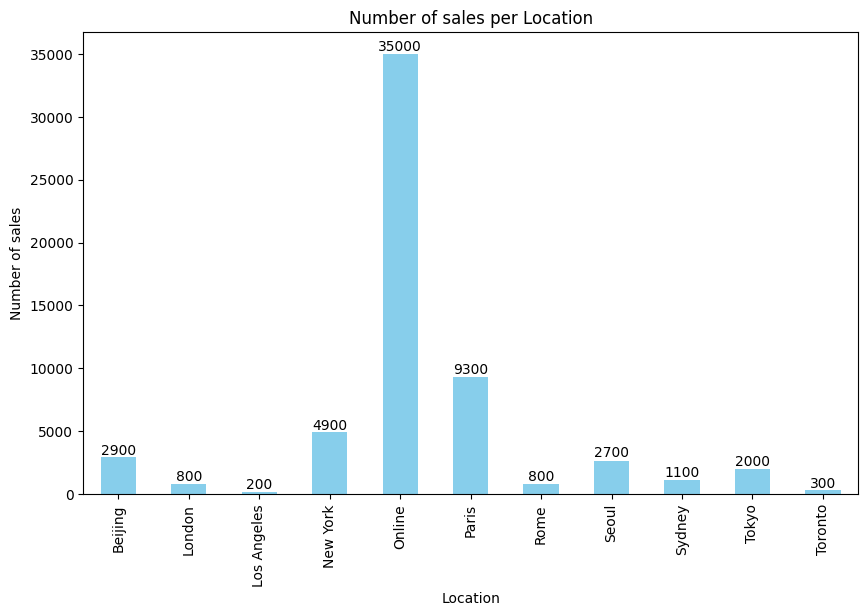

In [544]:
# Figure
plt.figure(figsize=(10, 6))
location_sales.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of sales per Location')
plt.xlabel('Location')
plt.ylabel('Number of sales')

# Data on the figure
for i, value in enumerate(location_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display
plt.show()

### Sales per Product

In [545]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values()

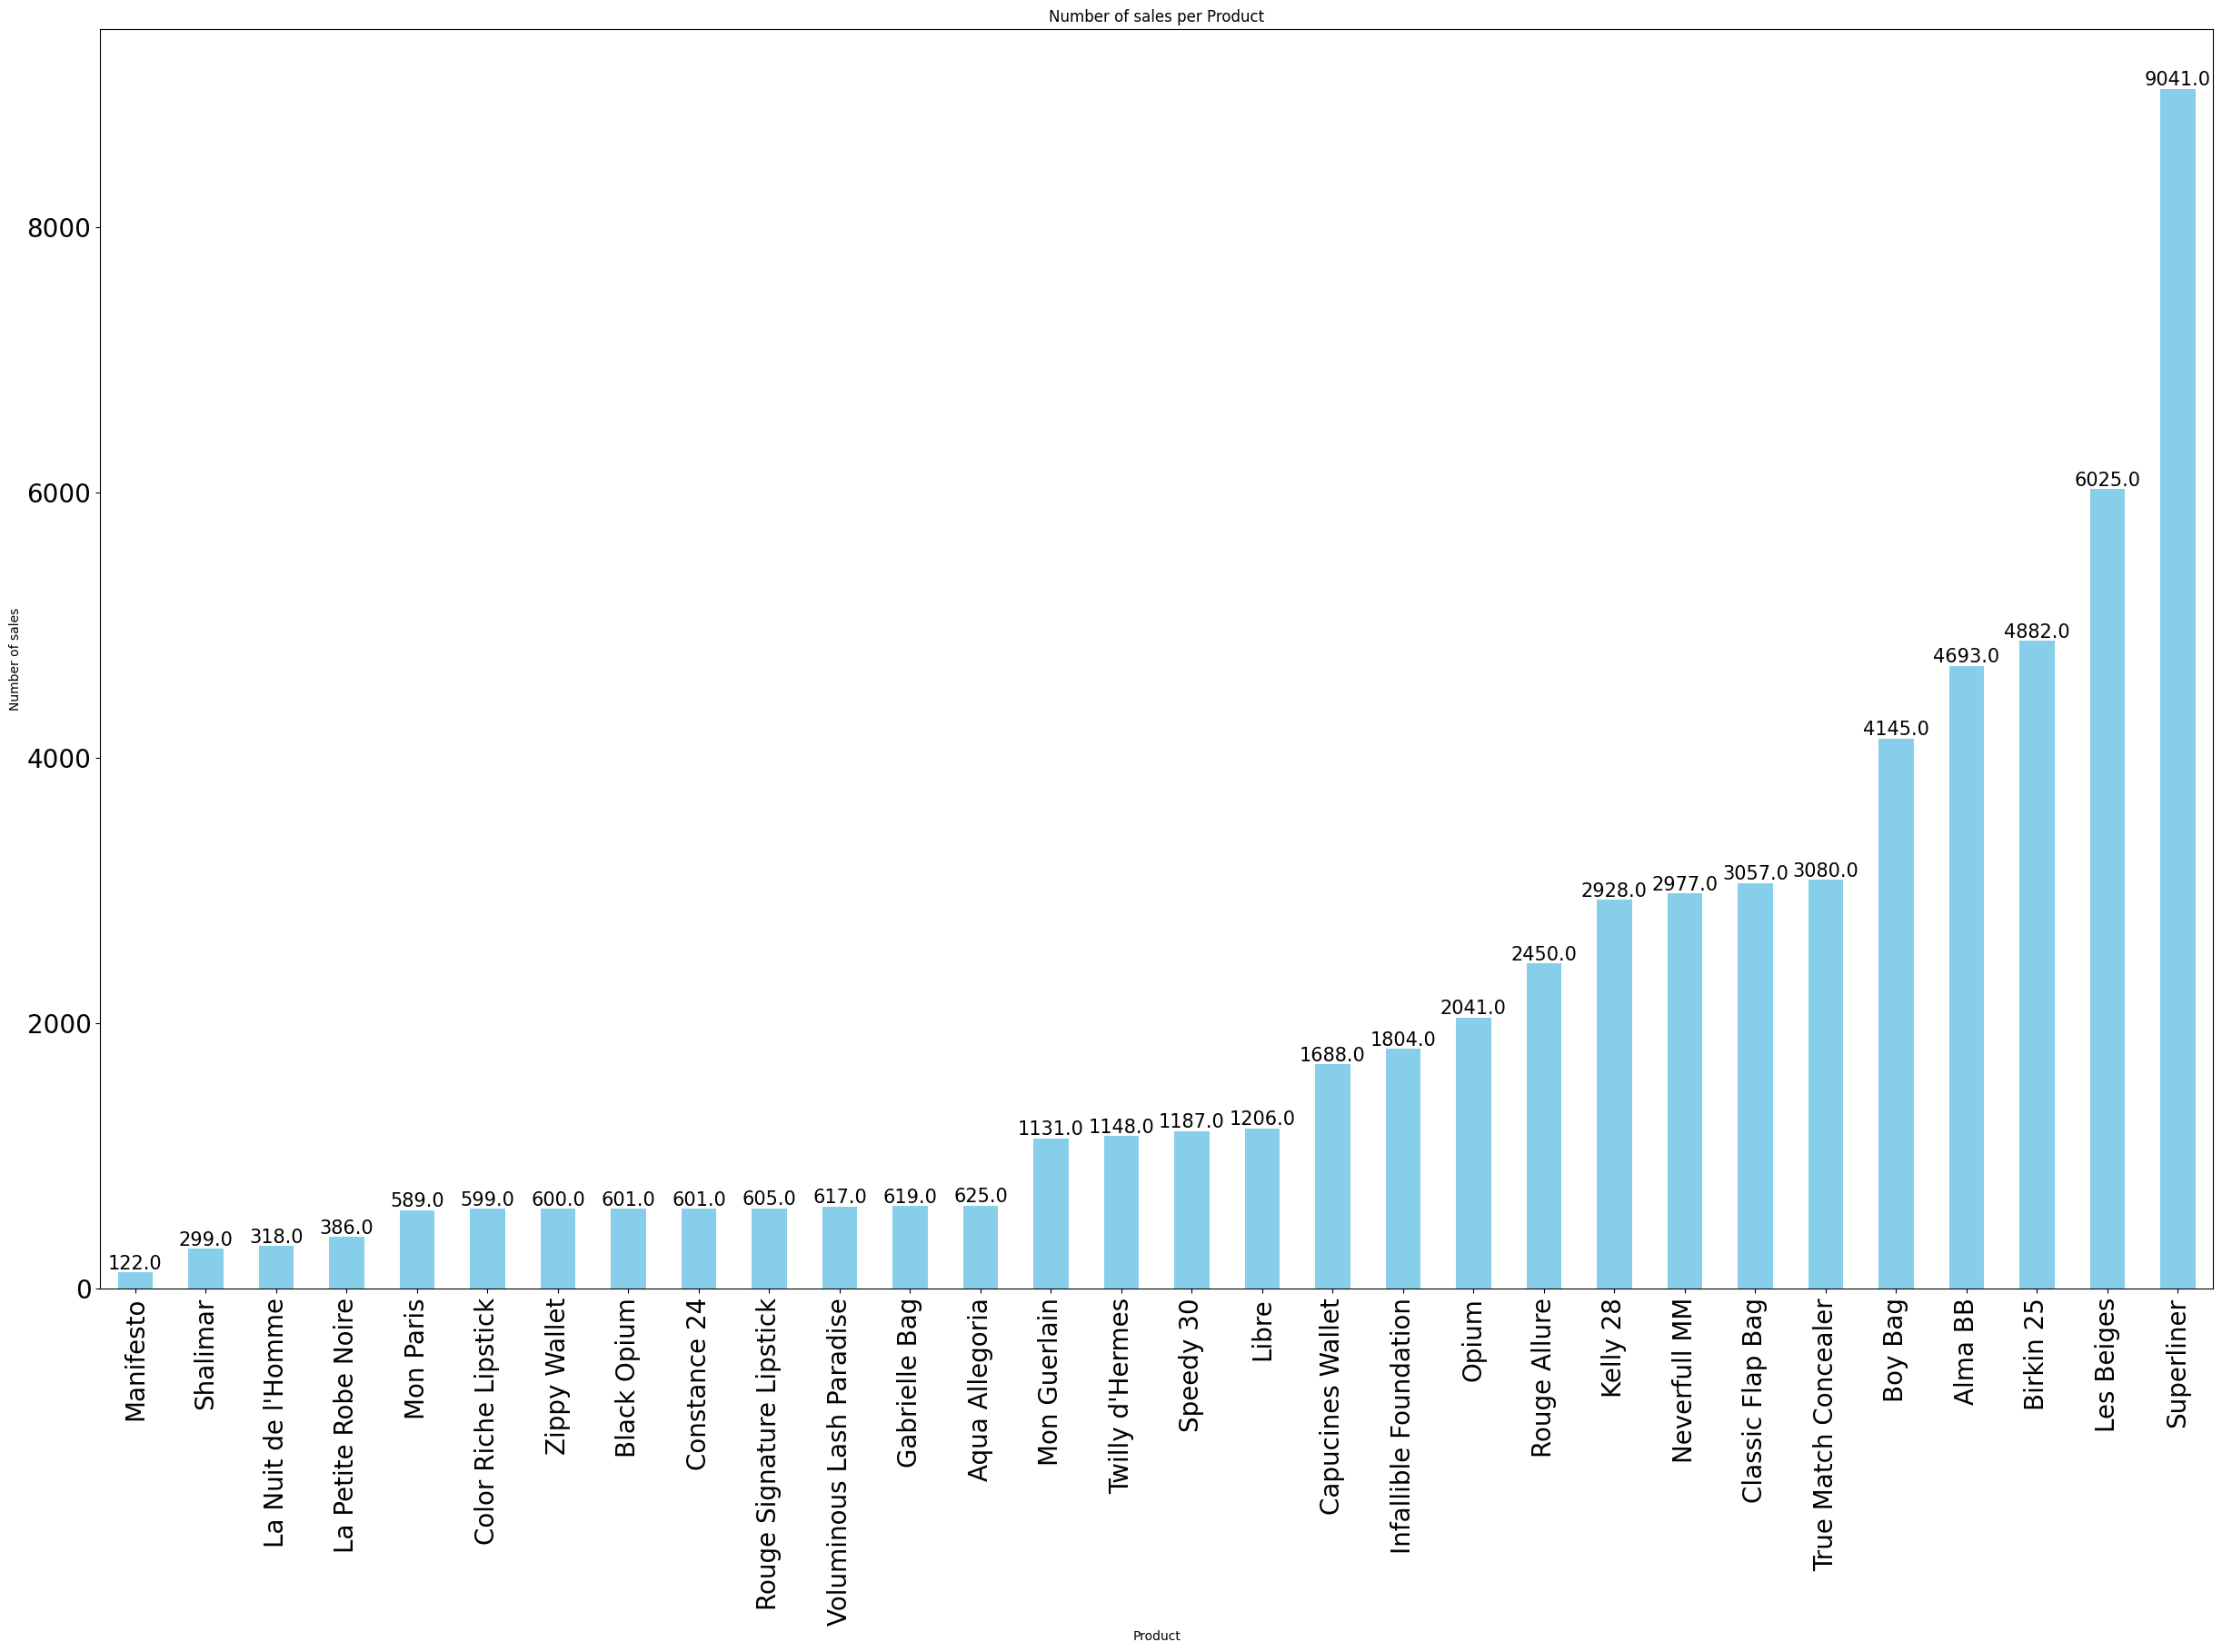

In [546]:
# Figure
plt.figure(figsize=(30, 18))
product_sales.plot(kind='bar', color='skyblue')

# Labelling
plt.title('Number of sales per Product')
plt.xlabel('Product')
plt.ylabel('Number of sales')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Data on the figure
for i, value in enumerate(product_sales):
    plt.text(i, value, str(value), ha='center', va='bottom',fontsize=15)

# Display
plt.show()

### Sales per Channel

In [547]:
channel_sales = df.groupby('Channel')['Sales'].sum()

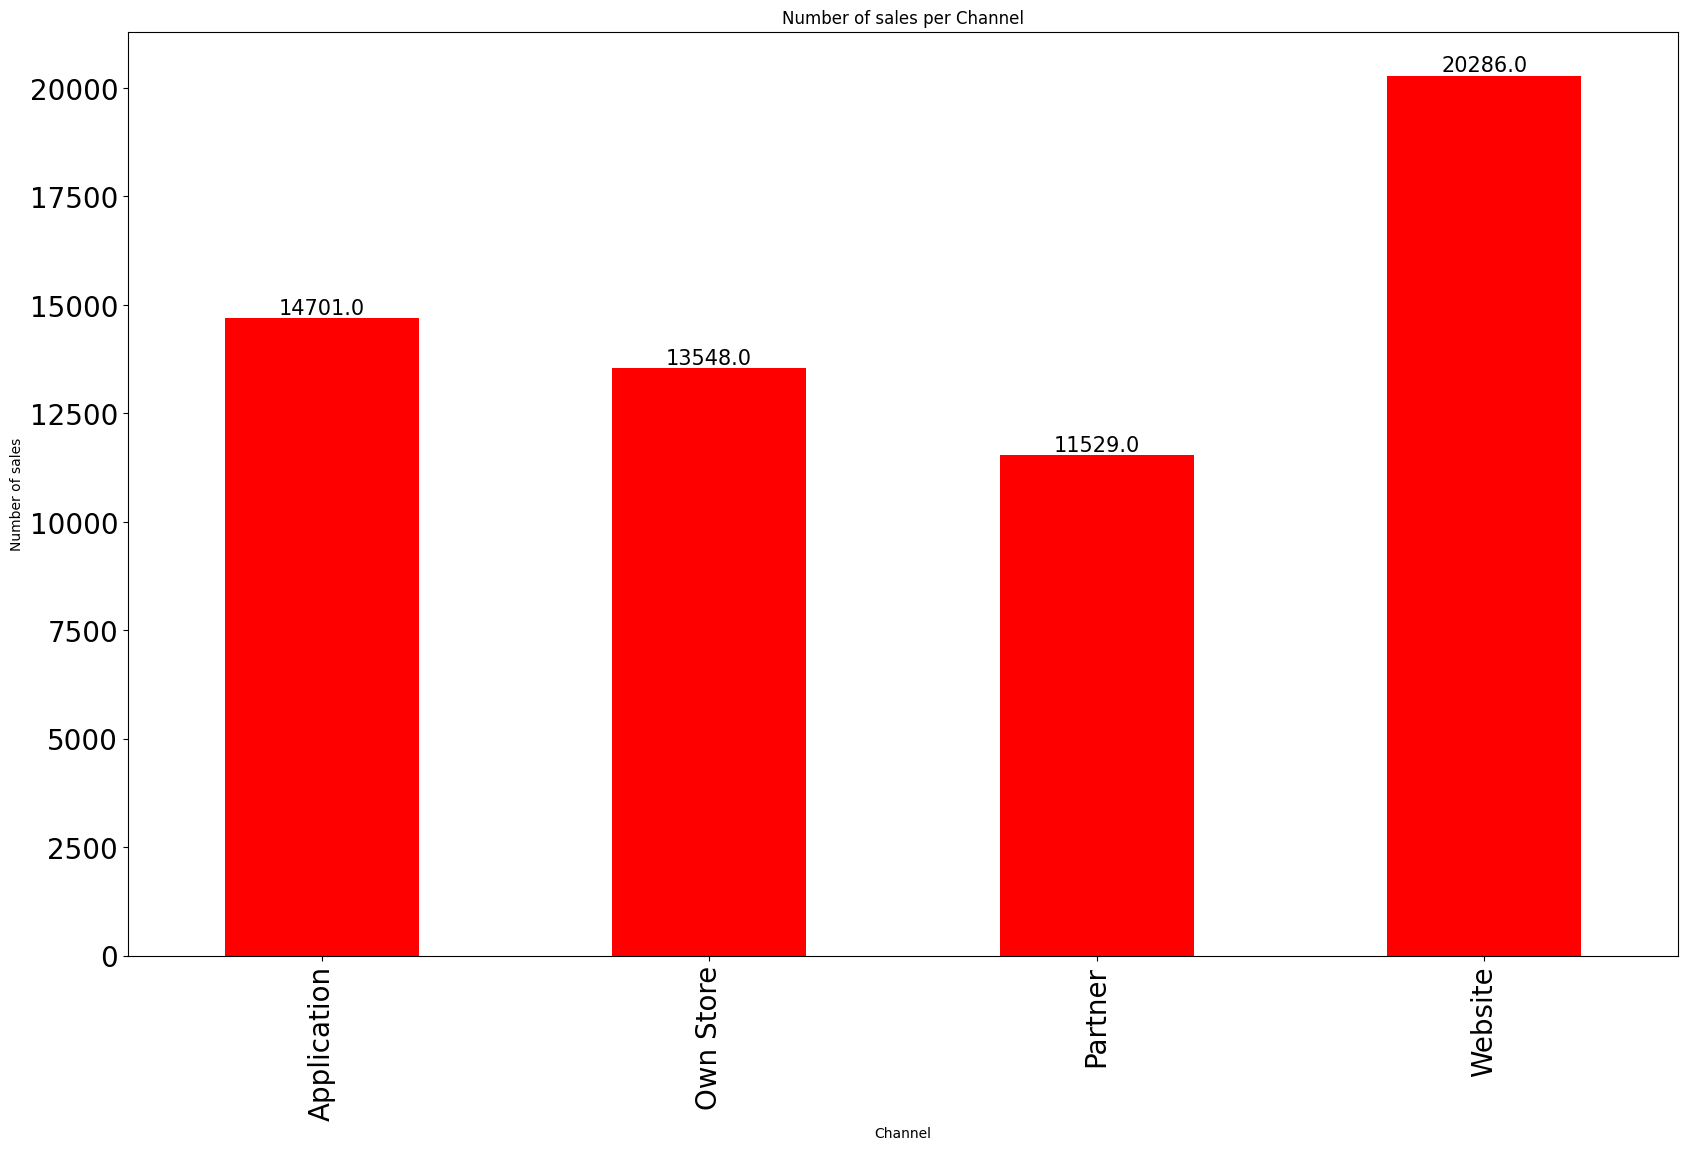

In [548]:
# Figure
plt.figure(figsize=(20, 12))
channel_sales.plot(kind='bar', color='red')

# Labelling
plt.title('Number of sales per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of sales')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Data on the figure
for i, value in enumerate(channel_sales):
    plt.text(i, value, str(value), ha='center', va='bottom',fontsize=15)

# Display
plt.show()

### Sales per Year

In [549]:
yearly_sales = df.groupby('Year')['Sales'].sum()

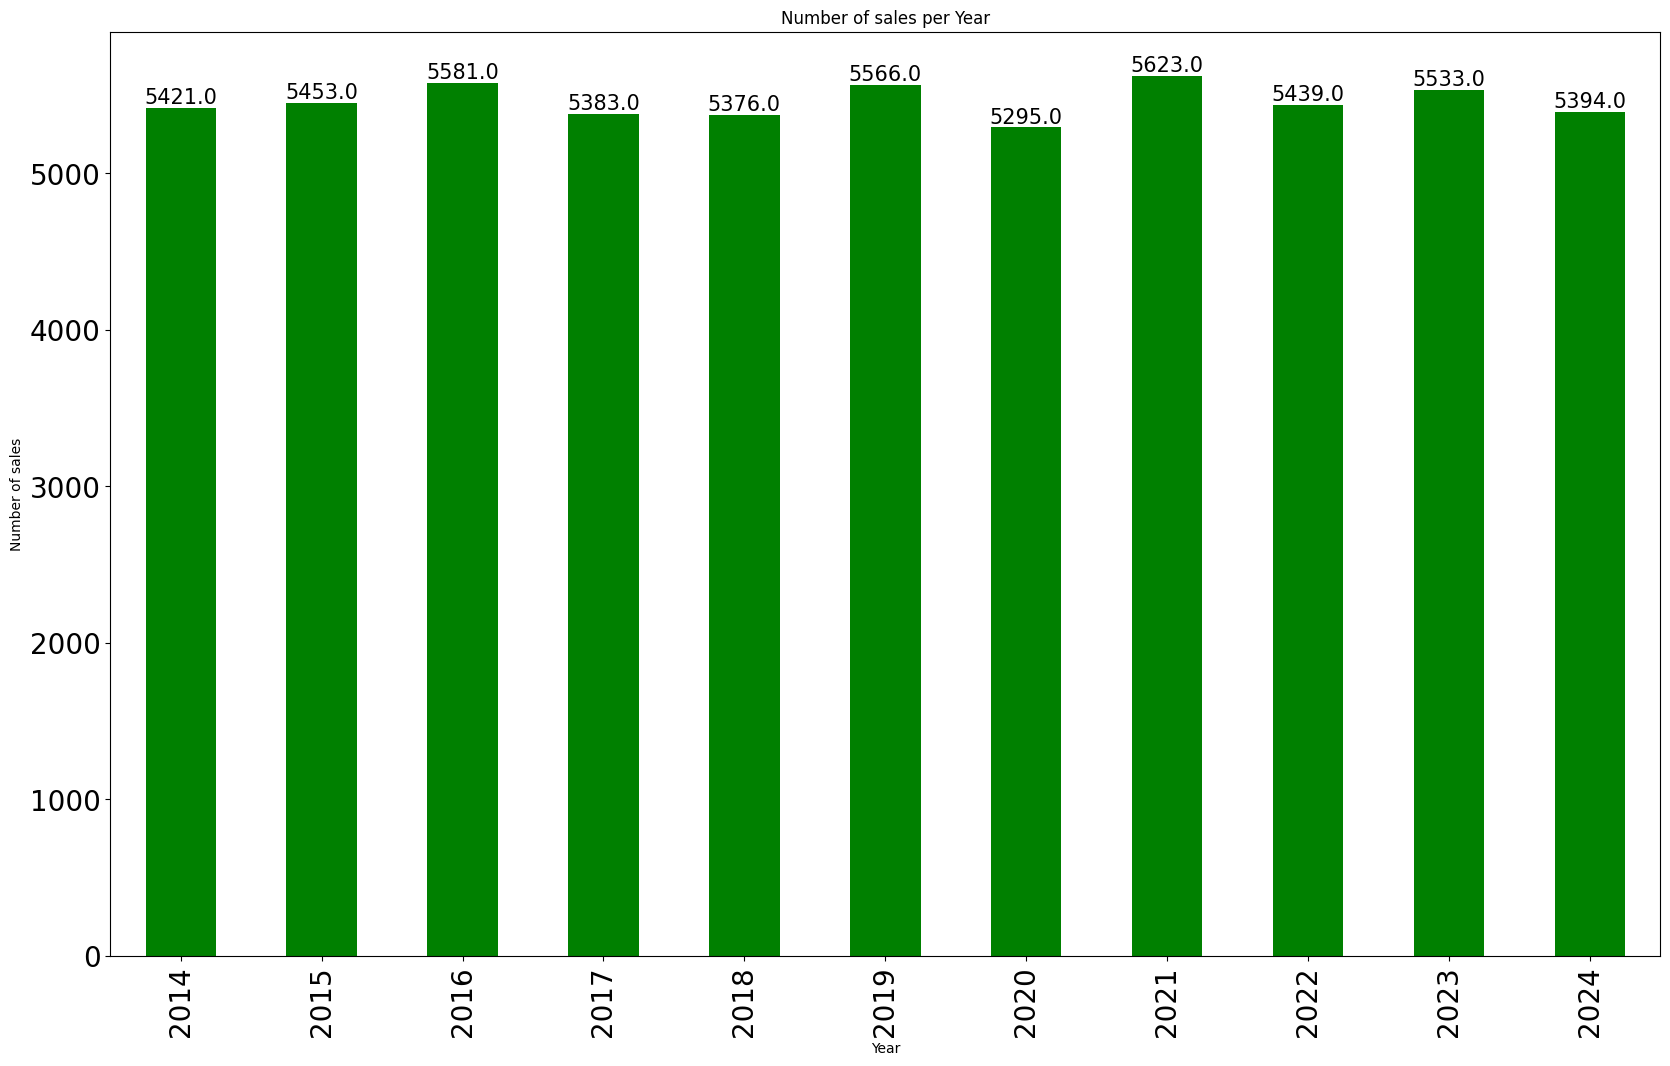

In [550]:
# Figure
plt.figure(figsize=(20, 12))
yearly_sales.plot(kind='bar', color='green')

# Labelling
plt.title('Number of sales per Year')
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Data on the figure
for i, value in enumerate(yearly_sales):
    plt.text(i, value, str(value), ha='center', va='bottom',fontsize=15)

# Display
plt.show()

### Sales per Month

In [551]:
monthly_sales = df.groupby('Month')['Sales'].sum()

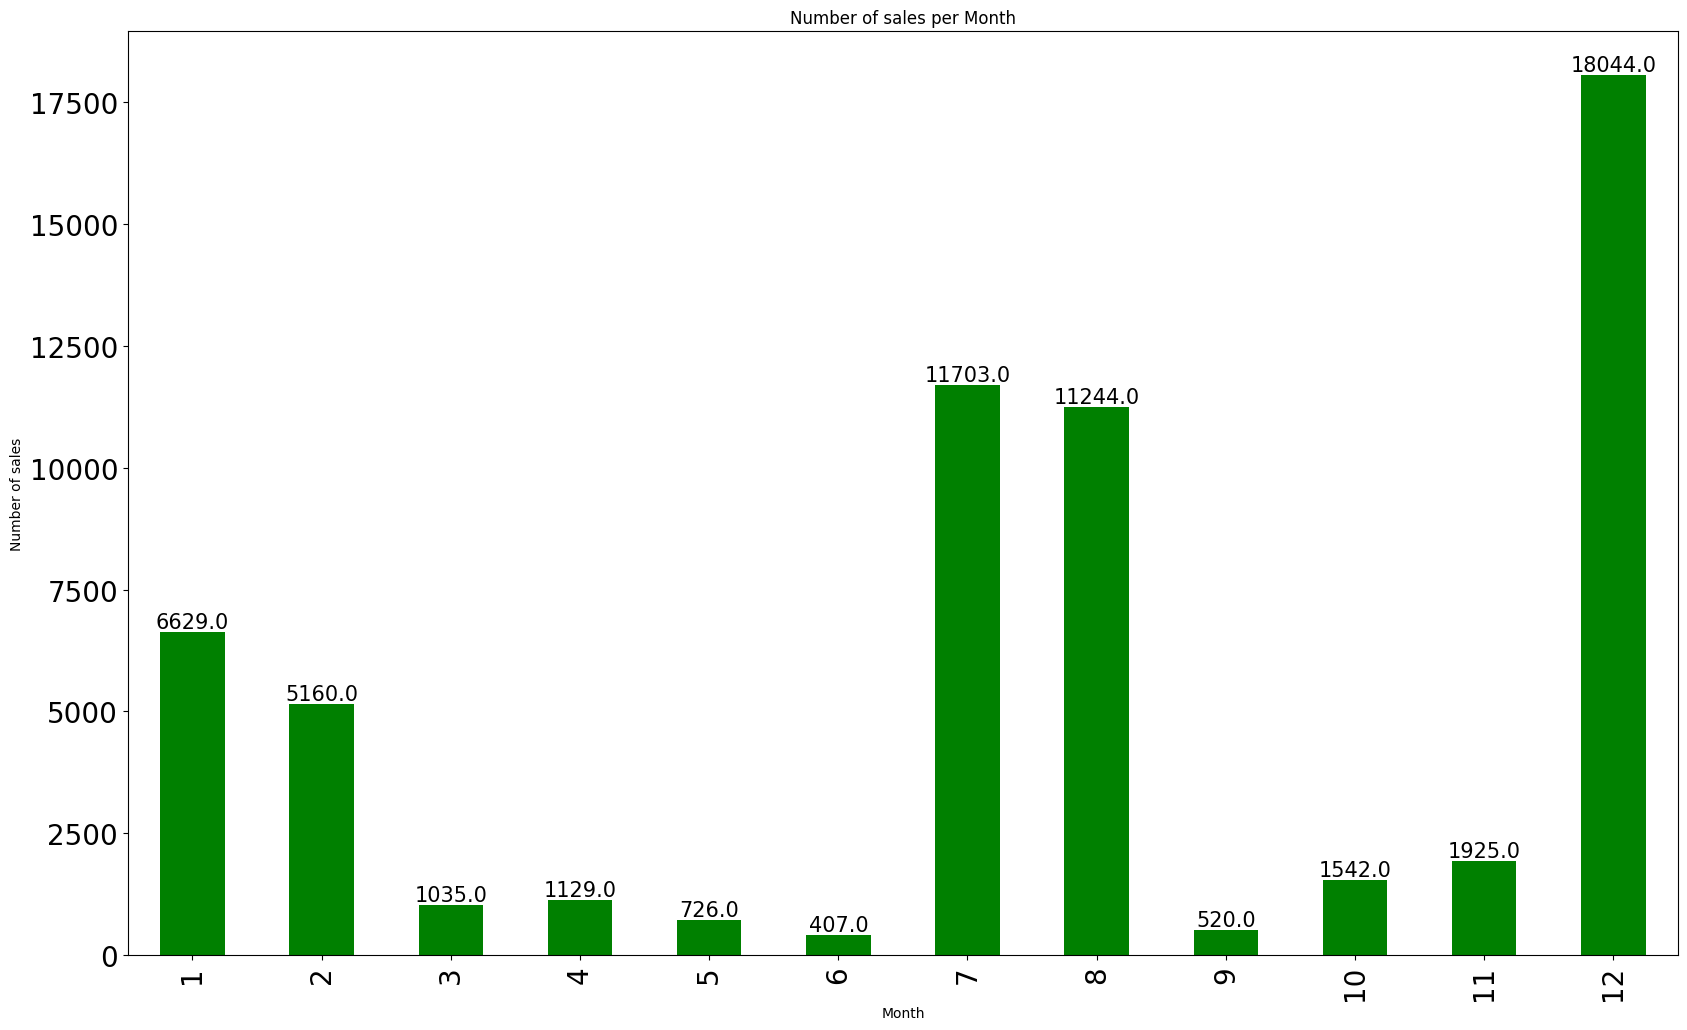

In [552]:
# Figure
plt.figure(figsize=(20, 12))
monthly_sales.plot(kind='bar', color='green')

# Labelling
plt.title('Number of sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Data on the figure
for i, value in enumerate(monthly_sales):
    plt.text(i, value, str(value), ha='center', va='bottom',fontsize=15)

# Display
plt.show()

## Main conclusions from the EDA

- Most sales are made online. Among the physical sales, there are significant disparities between cities.

- The products also show significant differences in terms of success with consumers.

- The differences are minimal for the years. The values remain stable from year to year.

- They are, however, very uneven across the months. There are clear seasonal trends.

## Feature Engineering

### Sum up sales per month & year

#### Create a MonthYear column

In [553]:
df['Month'] = df['Month'].astype(str).str.zfill(2)  
df['Year'] = df['Year'].astype(str)

df['MonthYear'] = df['Year'] + df['Month']

In [554]:
df['MonthYear'] = df['MonthYear'].astype('int64')

#### Group by the main characteristics to get the sum of sales for every product, every month, in every location, on every channel

In [555]:
df = df.groupby(['Product', 'MonthYear', 'Location', 'Channel','Year']).agg({
    'Sales': 'sum' 
}).reset_index()

In [556]:
df

,Product,MonthYear,Location,Channel,Year,Sales
0,Alma BB,201401,Beijing,Own Store,2014,1.0
1,Alma BB,201401,Beijing,Partner,2014,0.0
2,Alma BB,201401,London,Partner,2014,1.0
3,Alma BB,201401,New York,Partner,2014,2.0
4,Alma BB,201401,Online,Application,2014,15.0
...,...,...,...,...,...,...
16852,Zippy Wallet,202412,Paris,Own Store,2024,2.0
16853,Zippy Wallet,202412,Paris,Partner,2024,1.0
16854,Zippy Wallet,202412,Rome,Own Store,2024,0.0
16855,Zippy Wallet,202412,Tokyo,Own Store,2024,1.0


### New features Extraction

We retrieve some additional information for this dataframe.

#### Products

In [557]:
products = pd.read_excel('Products.xlsx')

In [558]:
products.head()

,id,Marque,Catégorie,Produit
0,1,Louis Vuitton,Sac à main,Neverfull MM
1,2,Louis Vuitton,Sac à main,Speedy 30
2,3,Louis Vuitton,Sac à main,Alma BB
3,4,Louis Vuitton,Portefeuille,Zippy Wallet
4,5,Louis Vuitton,Portefeuille,Capucines Wallet


Columns names need to fit with our original df columns' names.
They also need to be in English.

In [559]:
products.columns = ['id','Brand','Category','Product']

#### Economic Trends

In [560]:
eco_trends = pd.read_excel('Economic_Trends.xlsx')

In [565]:
eco_trends.head()

,Year,Location,Trend
0,2014,Europe,Neutral
1,2014,America,Favorable
2,2014,Asia,Favorable
3,2014,Online,Neutral
4,2015,Europe,Neutral


In [562]:
eco_trends.rename(columns={'Unnamed: 2':'Trend','Region':'Location'},inplace=True)

## Add new features to df

#### Products features

In [563]:
df = pd.merge(df,products,on='Product',how='left')

### Economic Trends features

In [566]:
df

,Product,MonthYear,Location,Channel,Year,Sales,id,Brand,Category
0,Alma BB,201401,Beijing,Own Store,2014,1.0,3.0,Louis Vuitton,Sac à main
1,Alma BB,201401,Beijing,Partner,2014,0.0,3.0,Louis Vuitton,Sac à main
2,Alma BB,201401,London,Partner,2014,1.0,3.0,Louis Vuitton,Sac à main
3,Alma BB,201401,New York,Partner,2014,2.0,3.0,Louis Vuitton,Sac à main
4,Alma BB,201401,Online,Application,2014,15.0,3.0,Louis Vuitton,Sac à main
...,...,...,...,...,...,...,...,...,...
16852,Zippy Wallet,202412,Paris,Own Store,2024,2.0,4.0,Louis Vuitton,Portefeuille
16853,Zippy Wallet,202412,Paris,Partner,2024,1.0,4.0,Louis Vuitton,Portefeuille
16854,Zippy Wallet,202412,Rome,Own Store,2024,0.0,4.0,Louis Vuitton,Portefeuille
16855,Zippy Wallet,202412,Tokyo,Own Store,2024,1.0,4.0,Louis Vuitton,Portefeuille


In [567]:
df['Location'] = df['Location'].astype(str)
eco_trends['Location'] = eco_trends['Location'].astype(str)

df['Year'] = df['Year'].astype(int)
eco_trends['Year'] = eco_trends['Year'].astype(int)

In [568]:
df = pd.merge(df,eco_trends,on=['Location','Year'],how='left')

## Keep only essential columns

### Check the product-id values-keys

In [569]:
unique_combinations = df[['Product', 'id']].drop_duplicates()

unique_combinations_array = unique_combinations.to_numpy()

unique_combinations_list = unique_combinations.values.tolist()

In [570]:
len(unique_combinations_list)

30

There are well 30 products, so it seems one distinct id corresponds to one distinct product. We can only keep id column.

In [572]:
df.head()

,Product,MonthYear,Location,Channel,Year,Sales,id,Brand,Category,Trend
0,Alma BB,201401,Beijing,Own Store,2014,1.0,3.0,Louis Vuitton,Sac à main,NaN
1,Alma BB,201401,Beijing,Partner,2014,0.0,3.0,Louis Vuitton,Sac à main,NaN
2,Alma BB,201401,London,Partner,2014,1.0,3.0,Louis Vuitton,Sac à main,NaN
3,Alma BB,201401,New York,Partner,2014,2.0,3.0,Louis Vuitton,Sac à main,NaN
4,Alma BB,201401,Online,Application,2014,15.0,3.0,Louis Vuitton,Sac à main,Neutral


### Essential columns

In [573]:
df = df[['Location','id', 'Sales', 'Channel', 'MonthYear', 'Brand', 'Category', 'Trend']] 

In [574]:
df.head()

,Location,id,Sales,Channel,MonthYear,Brand,Category,Trend
0,Beijing,3.0,1.0,Own Store,201401,Louis Vuitton,Sac à main,NaN
1,Beijing,3.0,0.0,Partner,201401,Louis Vuitton,Sac à main,NaN
2,London,3.0,1.0,Partner,201401,Louis Vuitton,Sac à main,NaN
3,New York,3.0,2.0,Partner,201401,Louis Vuitton,Sac à main,NaN
4,Online,3.0,15.0,Application,201401,Louis Vuitton,Sac à main,Neutral


### Null values

In [575]:
df.isnull().sum()

Location         0
id             502
Sales            0
Channel          0
MonthYear        0
Brand          502
Category       502
Trend        11803
dtype: int64

Let's assume an unknown trend can be considered as Unknown.

In [576]:
df['Trend'].fillna('Unknown',inplace=True)

/var/folders/5q/f280wjd15s56_y9s5ntbx3rw0000gn/T/ipykernel_28998/169603032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trend'].fillna('Unknown',inplace=True)


#### Remove the other NaN

In [577]:
df.dropna(inplace=True)

In [578]:
df.isnull().sum()

Location     0
id           0
Sales        0
Channel      0
MonthYear    0
Brand        0
Category     0
Trend        0
dtype: int64

### Translate French words into English words

In [579]:
df.head()

,Location,id,Sales,Channel,MonthYear,Brand,Category,Trend
0,Beijing,3.0,1.0,Own Store,201401,Louis Vuitton,Sac à main,Unknown
1,Beijing,3.0,0.0,Partner,201401,Louis Vuitton,Sac à main,Unknown
2,London,3.0,1.0,Partner,201401,Louis Vuitton,Sac à main,Unknown
3,New York,3.0,2.0,Partner,201401,Louis Vuitton,Sac à main,Unknown
4,Online,3.0,15.0,Application,201401,Louis Vuitton,Sac à main,Neutral


In [580]:
df['Category'].unique()

array(['Sac à main', 'Parfum', 'Portefeuille', 'Maquillage'], dtype=object)

In [581]:
category_mapping = {
    'Maquillage' : 'Makeup',
    'Sac à main' : 'Handbag',
    'Parfum' : 'Perfume',
    'Portefeuille' : 'Wallet'
}

In [582]:
df['Category'] = df['Category'].replace(category_mapping)

## Export

In [584]:
df.to_csv('df.csv')